## Assignment:- AAI 530 - Data cleaning and EDA
## Name:- Harish Acharya

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# Add your code logic below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [2]:
# Add your code logic below

data_file = "/Users/harish/Documents/USD-Sandiego/AAI530/module2/household_power_consumption.txt"
        
# Load the dataset
df_raw = pd.read_csv(data_file, delimiter=";", low_memory=False, na_values="?")


In [3]:
# Add your code logic below
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Add your code logic below
df_raw.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [5]:
# Add your code logic below
df_raw.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [6]:
# Add your code logic below

# Combine 'Date' and 'Time' into a single 'Datetime' column
df = df_raw.copy()
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df.drop(columns=['Date', 'Time'], inplace=True)

# Convert all other columns to numeric and handle errors
for col in df.columns:
    if col != 'Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values by forward-filling
df.fillna(method='ffill', inplace=True)


/var/folders/yg/p087zql17g5fk_t59w05qlw40000gp/T/ipykernel_44725/1717377346.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
#create your Datetime column

In [10]:
#convert all data columns to numeric types

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [7]:
# Add your code logic below
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [8]:
# Add your code logic below
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Date                             object
Time                             object
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [9]:
# Add your code logic below
df.Date[0]

datetime.date(2006, 12, 16)

In [10]:
# Add your code logic below
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [11]:
# Add your code logic below
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.2f}".format))
#desc[desc.columns] = desc[desc.columns].apply(lambda x: x.apply("{0:.0f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.00,2075259.00,2075259.00,2075259.00,2075259.00,2075259.00,2075259.00,2075259
mean,1.09,0.12,240.84,4.60,1.11,1.29,6.42,2008-12-06 07:12:59.999994112
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00,2006-12-16 17:24:00
25%,0.31,0.05,239.00,1.40,0.00,0.00,0.00,2007-12-12 00:18:30
50%,0.60,0.10,241.02,2.60,0.00,0.00,1.00,2008-12-06 07:13:00
75%,1.52,0.19,242.87,6.40,0.00,1.00,17.00,2009-12-01 14:07:30
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00,2010-11-26 21:02:00
std,1.05,0.11,3.24,4.43,6.12,5.79,8.42,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

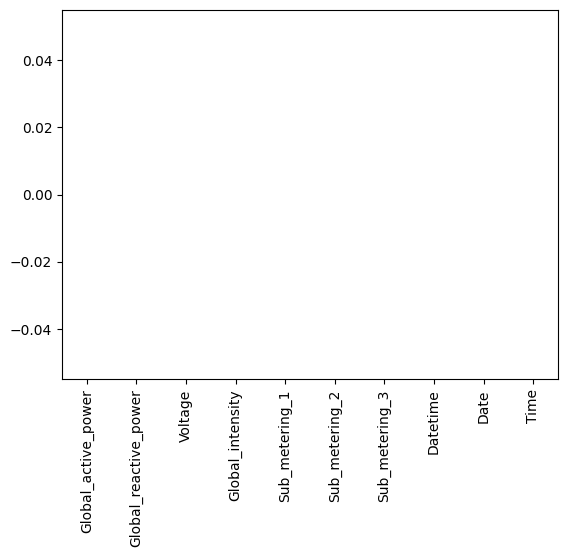

In [12]:
# Add your code logic below
df.isna().sum().plot.bar()

The above code df.isna().sum().plot.bar() produces an empty chart, it signifies that there are no missing values (i.e., NaN values) in the DataFrame df. 

<b>What This Signifies: </b> <br>
The DataFrame is Clean,There are no missing values in the dataset, at least at the column level.
No Further Action Needed for Missing Data:
Since there are no missing values, there’s no need for techniques like imputation or removal of rows/columns.



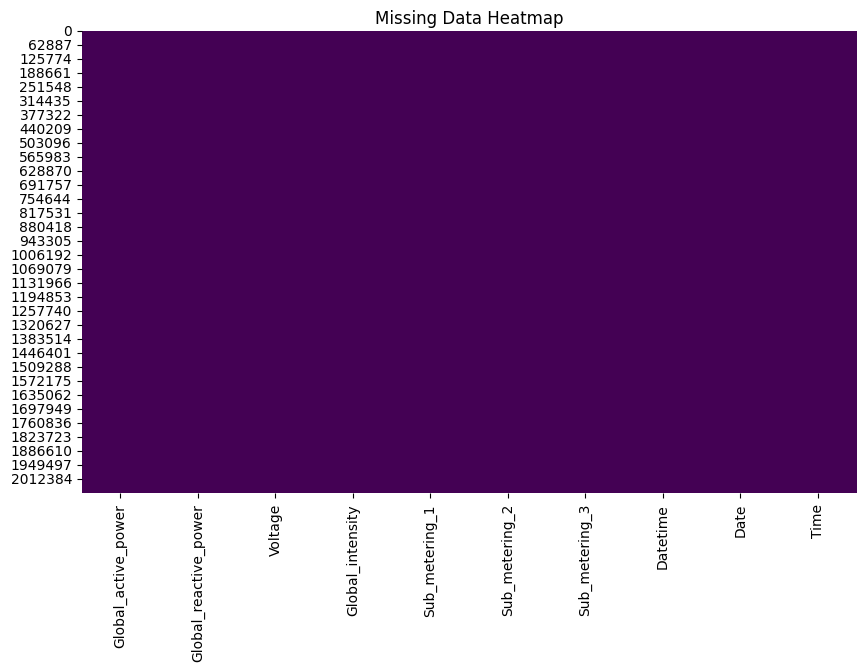

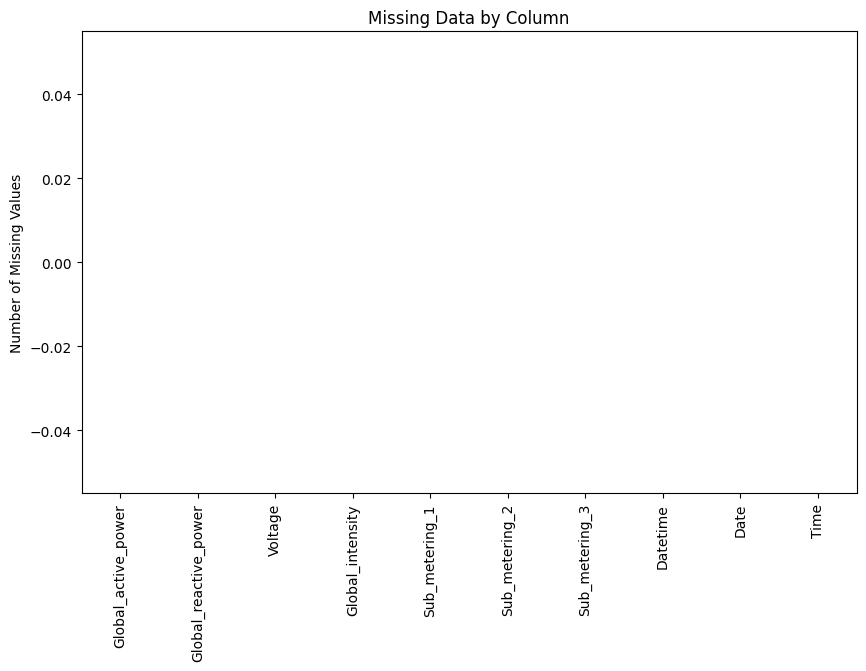

In [13]:
# Add your code logic below

# Visualizing missing data
import seaborn as sns

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# Count of missing values by column
df.isna().sum().plot(kind='bar', figsize=(10, 6))
plt.title("Missing Data by Column")
plt.ylabel("Number of Missing Values")
plt.show()


**Q: What do you notice about the pattern of missing data?**

A: From the above plottings,there is no missing data in the dataframe.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: When addressing missing data, it's crucial to select a method that aligns with the nature of the missingness and the specific context of your dataset. Since your dataset has no missing values, this concern is alleviated. However, for future reference or similar scenarios, here are some common strategies for handling missing data:

<B>Remove Missing Data: </B>If only a small percentage of rows or columns have missing data (e.g., less than 5% of the total), it’s often simplest to remove the rows or columns.

<B>Mean/Median/Mode Imputation:</B> For numerical data, you can fill missing values with the mean or median of that column. For categorical data, the mode (most frequent value) can be used.

<B>K-Nearest Neighbors (KNN) Imputation</B> Predicting missing values using regression models based on other available variables. This method preserves relationships between variables but may underestimate the true variability in the data. 
WIKIPEDIA

<B>Predictive Modeling:</B> More sophisticated models like Random Forest, XGBoost, or deep learning methods can be trained to predict the missing values based on other variables in the dataset

<B>Why these methods make sense:</B> 
Removing missing data: Works best if the data is missing in random.
Imputation: Ensures you don't lose valuable data, especially when it is systematic way in which data is missing
Predictive modeling: Leverages the complexity in the dataset and uses relationships to better fill in missing data, reducing bias compared to simpler methods.

**TODO:Use your preferred method to remove or impute a value for the missing data**

## clean up missing data here

When tasked with handling missing data, it's essential to choose a method that aligns with the nature of the missingness and the specific context of your dataset. Since your dataset currently has no missing values, this concern is alleviated. However, for future reference or similar scenarios, here are some common strategies for handling missing data:

<B>Listwise Deletion:</B> This approach involves removing any records with missing values. It's straightforward but can significantly reduce your sample size, potentially leading to biased results if the missingness is not completely random.

<B>Mean/Median/Mode Imputation: </B> Replacing missing values with the mean, median, or mode of the available data for that variable. While simple, this method can underestimate variability and distort relationships between variables.

<B>Regression Imputation: </B> Predicting missing values using regression models based on other available variables. This method preserves relationships between variables but may underestimate the true variability in the data.

<B>Multiple Imputation: </B> Creating multiple datasets with different imputed values and combining the results to account for the uncertainty inherent in the imputation process. This method is more robust and provides valid statistical inferences.

<B>Advanced Machine Learning Techniques: </B> Utilizing models like k-Nearest Neighbors (k-NN) or deep learning methods to predict missing values based on patterns in the data. These methods can capture complex relationships but may require more computational resources.

The choice of method depends on factors such as the proportion of missing data, the missing data mechanism (e.g., Missing Completely at Random, Missing at Random, Missing Not at Random), and the specific requirements of your analysis. It's often advisable to perform sensitivity analyses using different methods to assess the robustness of your results.

In [14]:
# Add your code logic below
desc = df.describe()

#force the printout not to use scientific notation
# Set pandas display options to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.00,2075259.00,2075259.00,2075259.00,2075259.00,2075259.00,2075259.00,2075259
mean,1.09,0.12,240.84,4.60,1.11,1.29,6.42,2008-12-06 07:12:59.999994112
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00,2006-12-16 17:24:00
25%,0.31,0.05,239.00,1.40,0.00,0.00,0.00,2007-12-12 00:18:30
50%,0.60,0.10,241.02,2.60,0.00,0.00,1.00,2008-12-06 07:13:00
75%,1.52,0.19,242.87,6.40,0.00,1.00,17.00,2009-12-01 14:07:30
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00,2010-11-26 21:02:00
std,1.05,0.11,3.24,4.43,6.12,5.79,8.42,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: 

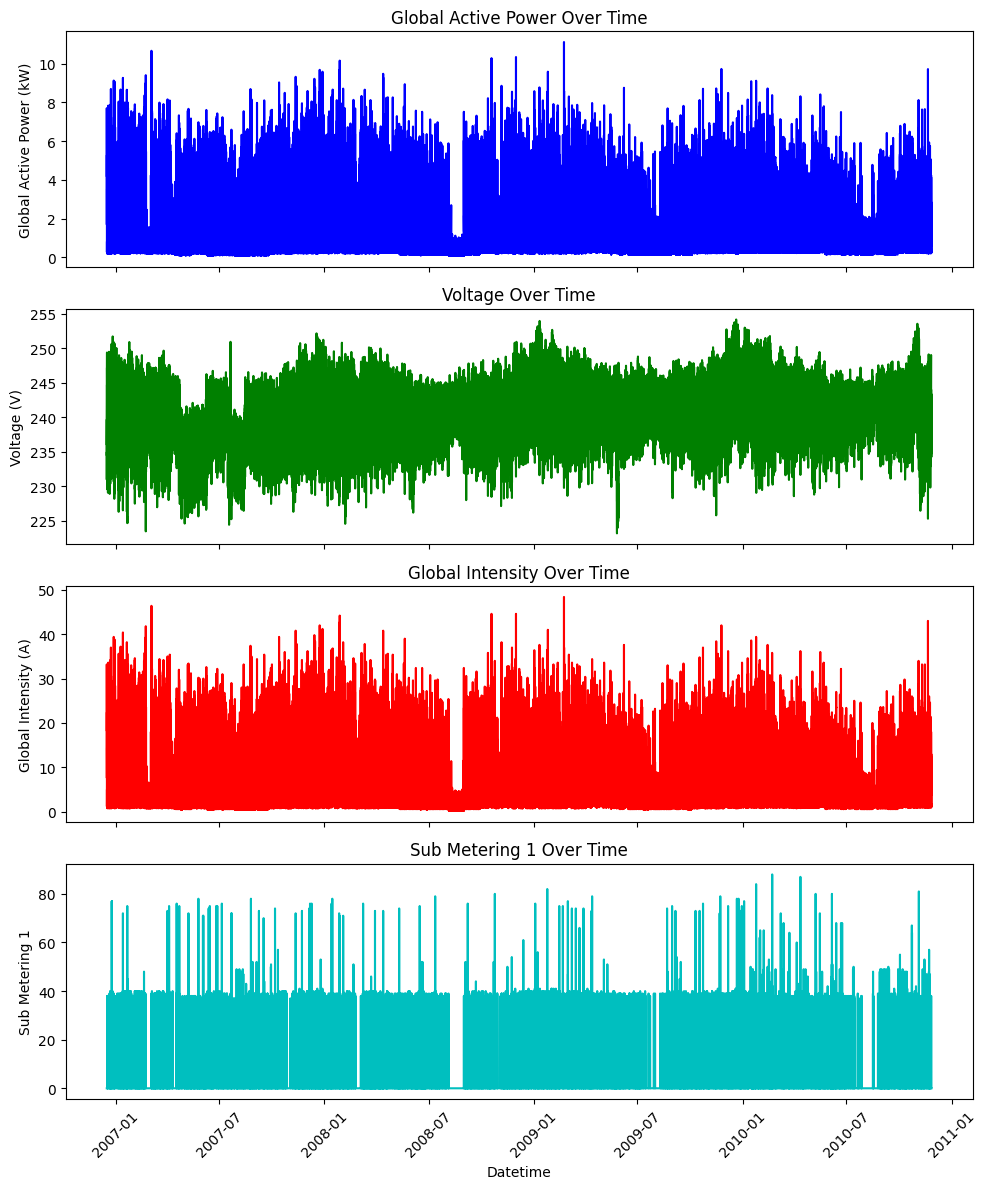

In [15]:
#build your line chart here
# Set the 'Datetime' column as the index of the DataFrame
df.set_index('Datetime', inplace=True)

# Now, let's plot the time series data for the selected variables
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot 1: Global Active Power
axes[0].plot(df.index, df['Global_active_power'], label='Global Active Power', color='b')
axes[0].set_title('Global Active Power Over Time')
axes[0].set_ylabel('Global Active Power (kW)')

# Plot 2: Voltage
axes[1].plot(df.index, df['Voltage'], label='Voltage', color='g')
axes[1].set_title('Voltage Over Time')
axes[1].set_ylabel('Voltage (V)')

# Plot 3: Global Intensity
axes[2].plot(df.index, df['Global_intensity'], label='Global Intensity', color='r')
axes[2].set_title('Global Intensity Over Time')
axes[2].set_ylabel('Global Intensity (A)')

# Plot 4: Sub Metering 1
axes[3].plot(df.index, df['Sub_metering_1'], label='Sub Metering 1', color='c')
axes[3].set_title('Sub Metering 1 Over Time')
axes[3].set_ylabel('Sub Metering 1')

# Add common labels and improve layout
plt.xlabel('Datetime')
plt.xticks(rotation=45)

# Adjust the layout to make space for labels
plt.tight_layout()

# Show the plot
plt.show()


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

### When visualizing raw time series data like this, you see the following observations:
High Variability - There may be high fluctuations in data
Difficulty in identifying patterns - Noise in data and no clear trends

### Is this a useful visualization? Why or why not?

- No it is not since 
-   There is difficulty in identifying patterns
-   lack of clarity for long time periods


**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 



/var/folders/yg/p087zql17g5fk_t59w05qlw40000gp/T/ipykernel_44725/1239232155.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df_numeric.resample('M').mean()


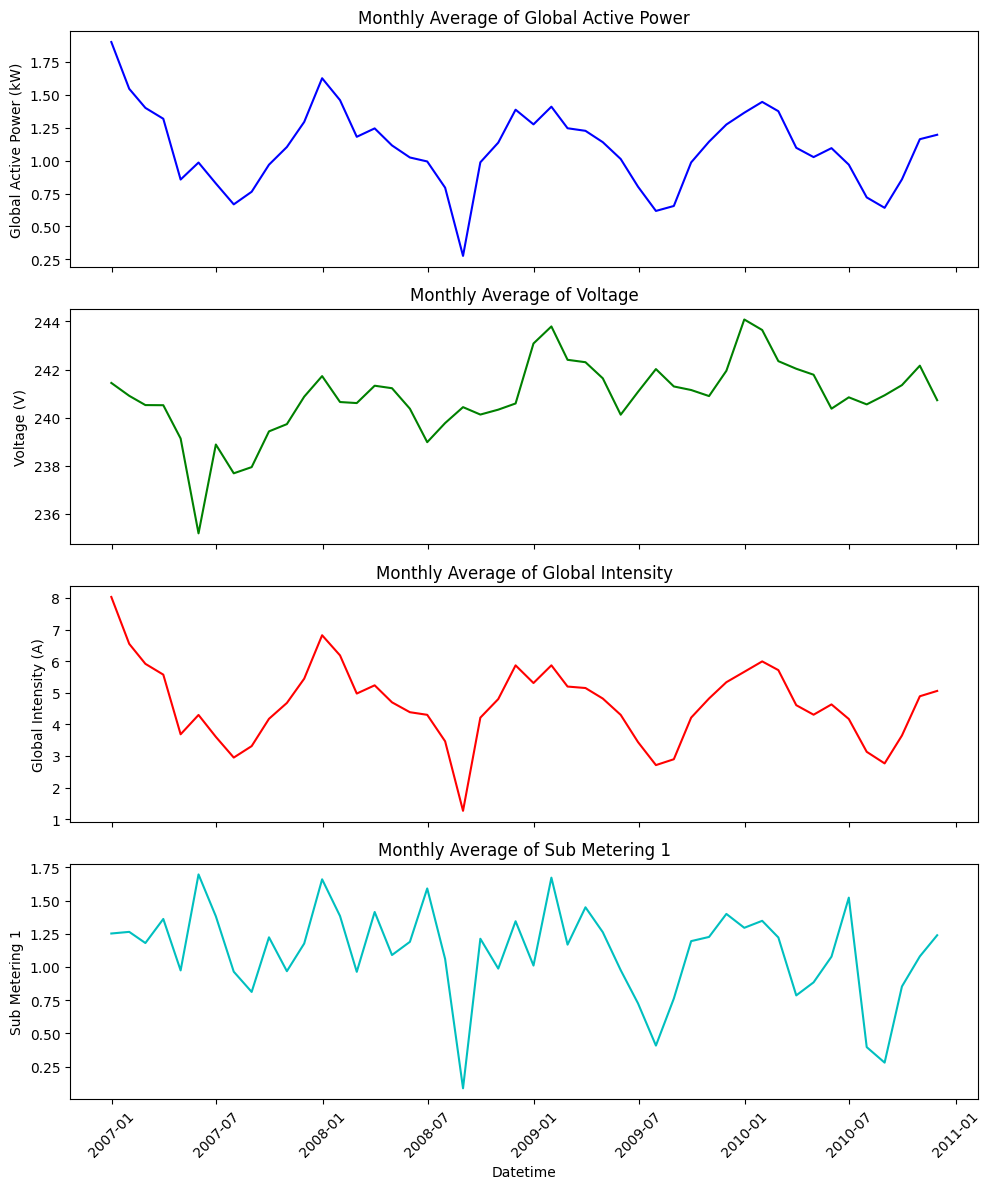

In [17]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
# Resample data by month, calculating the monthly mean
# Select only numeric columns for resampling (ignore non-numeric columns like 'Datetime')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Resample by month and calculate the mean of the numeric columns
monthly_df = df_numeric.resample('M').mean()

# Plotting the monthly averages
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot 1: Global Active Power (Monthly Average)
axes[0].plot(monthly_df.index, monthly_df['Global_active_power'], label='Global Active Power', color='b')
axes[0].set_title('Monthly Average of Global Active Power')
axes[0].set_ylabel('Global Active Power (kW)')

# Plot 2: Voltage (Monthly Average)
axes[1].plot(monthly_df.index, monthly_df['Voltage'], label='Voltage', color='g')
axes[1].set_title('Monthly Average of Voltage')
axes[1].set_ylabel('Voltage (V)')

# Plot 3: Global Intensity (Monthly Average)
axes[2].plot(monthly_df.index, monthly_df['Global_intensity'], label='Global Intensity', color='r')
axes[2].set_title('Monthly Average of Global Intensity')
axes[2].set_ylabel('Global Intensity (A)')

# Plot 4: Sub Metering 1 (Monthly Average)
axes[3].plot(monthly_df.index, monthly_df['Sub_metering_1'], label='Sub Metering 1', color='c')
axes[3].set_title('Monthly Average of Sub Metering 1')
axes[3].set_ylabel('Sub Metering 1')

# Add common labels and improve layout
plt.xlabel('Datetime')
plt.xticks(rotation=45)

# Adjust the layout to make space for labels
plt.tight_layout()

# Show the plot
plt.show()

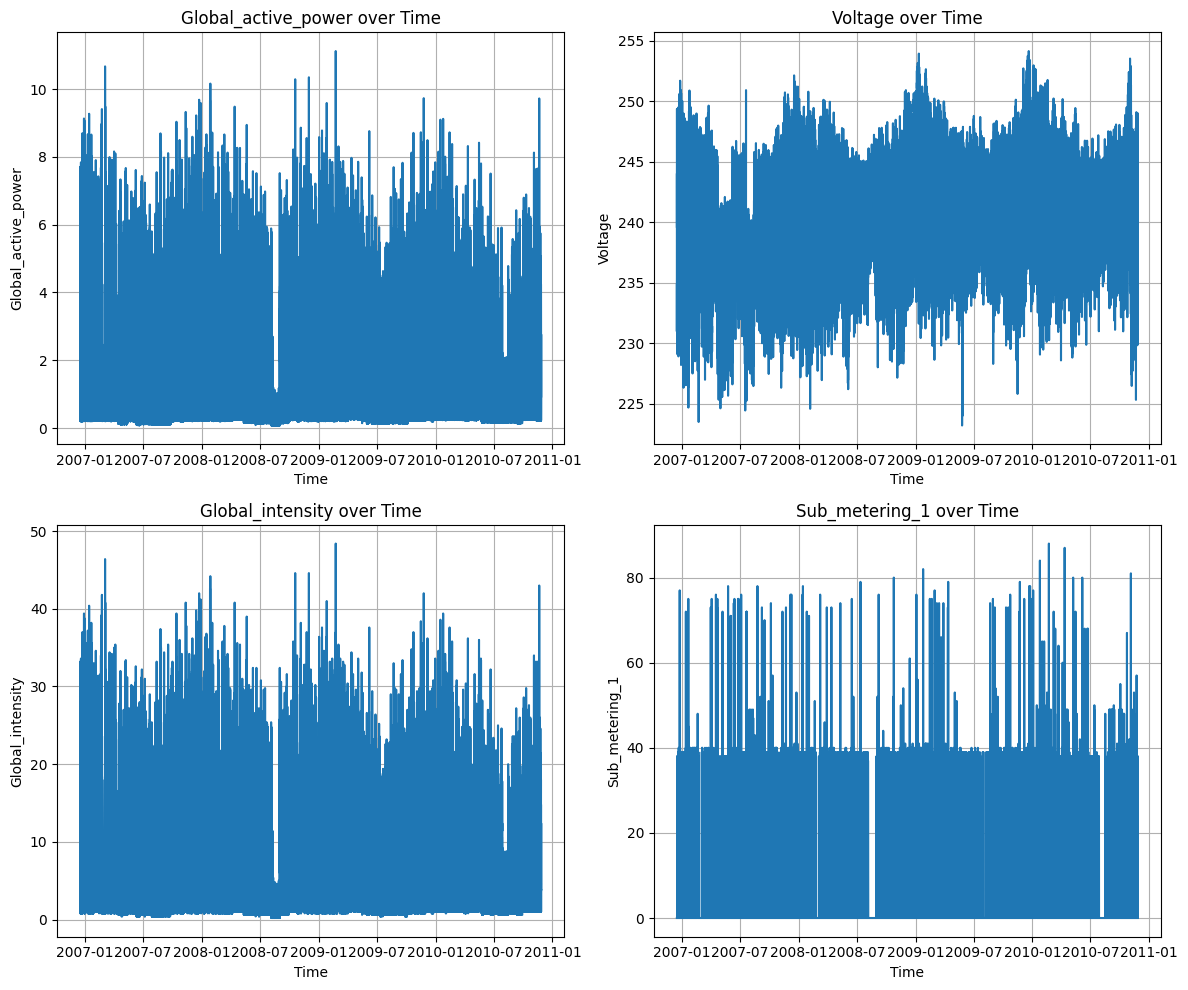

In [22]:
# Add your code logic below

# Visualize selected variables over time
variables_to_visualize = ['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1']

# Plot the selected variables over time
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables_to_visualize):
    plt.subplot(2, 2, i + 1)
    plt.plot(df.index, df[var], label=var, color='tab:blue')
    plt.title(f'{var} over Time')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.grid(True)

# Improve layout and make space for labels
plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: The time series data shows clear monthly and annual patterns in electricity consumption. Global_active_power and Global_intensity exhibit strong positive correlations, suggesting a direct relationship between power and intensity. Sub_metering_1 also contributes to overall electricity consumption, but its relationship with other variables is less pronounced.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [23]:
#compute your moving average here

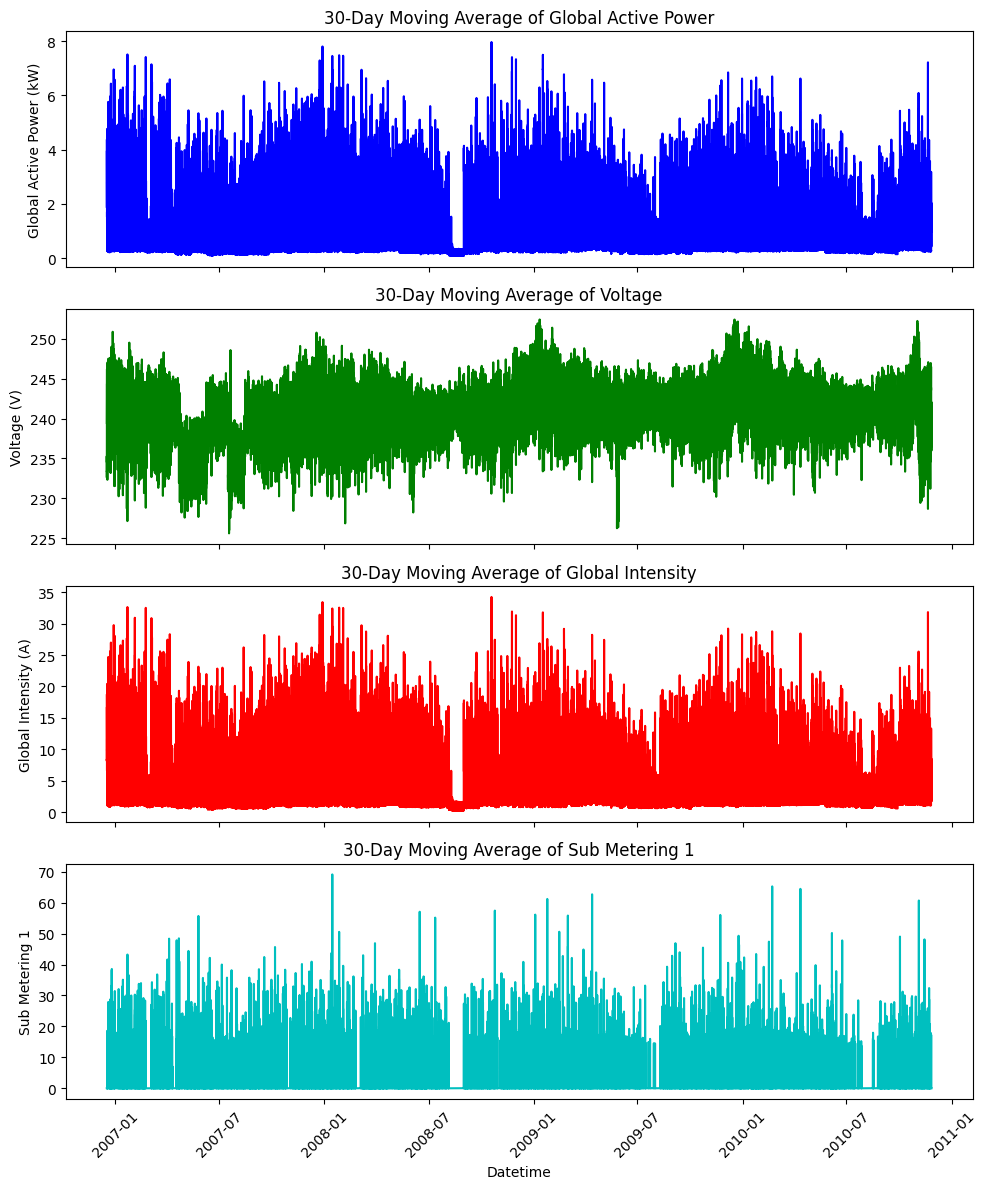

In [26]:
#build your line chart on the moving average here

# Compute 30-day moving average for the numeric columns

# Select only numeric columns for resampling (ignore non-numeric columns like 'Datetime')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

rolling_df = df_numeric.rolling(window=30).mean()

# Plotting the 30-day moving averages
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot 1: Global Active Power (30-Day Moving Average)
axes[0].plot(rolling_df.index, rolling_df['Global_active_power'], label='Global Active Power', color='b')
axes[0].set_title('30-Day Moving Average of Global Active Power')
axes[0].set_ylabel('Global Active Power (kW)')

# Plot 2: Voltage (30-Day Moving Average)
axes[1].plot(rolling_df.index, rolling_df['Voltage'], label='Voltage', color='g')
axes[1].set_title('30-Day Moving Average of Voltage')
axes[1].set_ylabel('Voltage (V)')

# Plot 3: Global Intensity (30-Day Moving Average)
axes[2].plot(rolling_df.index, rolling_df['Global_intensity'], label='Global Intensity', color='r')
axes[2].set_title('30-Day Moving Average of Global Intensity')
axes[2].set_ylabel('Global Intensity (A)')

# Plot 4: Sub Metering 1 (30-Day Moving Average)
axes[3].plot(rolling_df.index, rolling_df['Sub_metering_1'], label='Sub Metering 1', color='c')
axes[3].set_title('30-Day Moving Average of Sub Metering 1')
axes[3].set_ylabel('Sub Metering 1')

# Add common labels and improve layout
plt.xlabel('Datetime')
plt.xticks(rotation=45)

# Adjust the layout to make space for labels
plt.tight_layout()

# Show the plot
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: 
- 30-day moving average is generally more effective than monthly average.
- It smooths out short-term fluctuations, revealing longer-term trends and seasonal patterns. Monthly averages can obscure these patterns.
- 30-day moving average shows clear seasonal variations in electricity consumption for Global_active_power, Global_intensity, and Sub_metering_1.
However, 30-day moving average introduces a lag in the data due to the averaging window.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

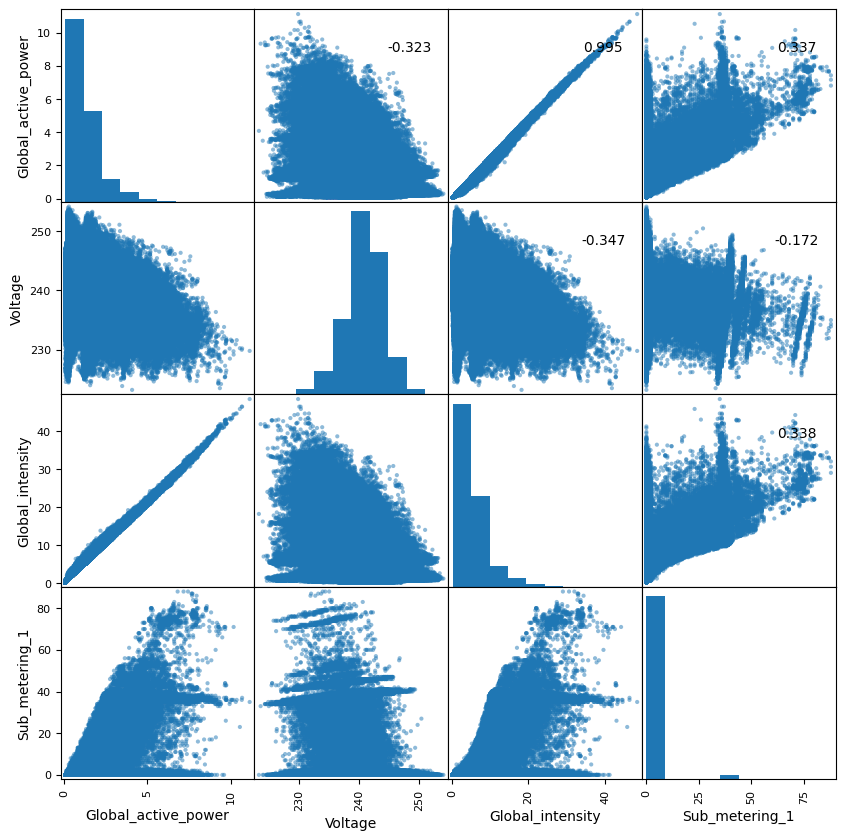

In [24]:
# Add your code logic below
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Voltage', 'Global_intensity','Sub_metering_1' ]], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Voltage', 'Global_intensity','Sub_metering_1']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: 
- The scatterplot matrix reveals several key correlations between the variables.
- Global_active_power and Global_intensity exhibit a strong positive linear relationship.
- Sub_metering_1 shows moderate positive correlations with both Global_active_power and Global_intensity.
- Voltage has negligible correlations with other variables.
- These relationships have implications for downstream tasks like feature selection, model building, and anomaly detection.
- Further analysis, including time series analysis, is needed to fully understand the dynamics and predict future values.